# GPyOpt: Deep Bayesian Optimization 

In the [Introduction Bayesian Optimization GPyOpt](./GPyOpt_reference_manual.ipynb) we showed how GPyOpt can be used to solve optimization problems with some basic functionalities. The object 

```
GPyOpt.methods.BayesianOptimization
```
is used to initialize the desired functionalities, such us the acquisition function, the initial design or the model. In some cases we want to have control over those objects and we may want to replace some element in the loop without having to integrate the new elements in the base code framework. This is now possible through the modular implementation of the package using the

```
GPyOpt.methods.ModularBayesianOptimization
```

As usual, we start loading GPy and GPyOpt.

In [1]:
%pylab inline
import GPyOpt
import GPy
import deepgp

Populating the interactive namespace from numpy and matplotlib


In this example we will use the Branin function as a test case.

In [ ]:
# --- Function to optimize
func  = GPyOpt.objective_examples.experiments2d.branin()
func.plot()

Because we are won't use the pre implemented wrapper, we need to create the classes for each element of the optimization. In total we need to create:

* Class for the **objective function**,

In [ ]:
objective = GPyOpt.core.task.SingleObjective(func.f)

* Class for the **design space**,

In [ ]:
space = GPyOpt.Design_space(space =[{'name': 'var_1', 'type': 'continuous', 'domain': (-5,10)},
                                    {'name': 'var_2', 'type': 'continuous', 'domain': (1,15)}])

* Class for the **model type**,

In [ ]:
modelGP = GPyOpt.models.GPModel(optimize_restarts=5,verbose=True)

* Class for the **acquisition optimizer**,

In [ ]:
acquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(space)

* Class for the **initial design**,

In [ ]:
initial_design = GPyOpt.util.stats.initial_design('random', space, 5)

In [ ]:
cost = GPyOpt.core.task.cost.CostModel(None)
acquisition_jitter=0.01

In [ ]:
acquisition = GPyOpt.acquisitions.AcquisitionEI(modelGP, space, acquisition_optimizer, cost.cost_withGradients, acquisition_jitter)

* Finally we create the class for the **type of evaluator**,

In [ ]:
evaluator = GPyOpt.core.evaluators.Sequential(acquisition)

With all the classes on place,including the one we have created for this example, we can now create the **Bayesian optimization object**.

In [ ]:
bo = GPyOpt.methods.ModularBayesianOptimization(modelGP, space, objective, acquisition, evaluator, initial_design)
print bo.model.model

And we run the optimization.

In [ ]:
max_iter  = 20                                            
bo.run_optimization(max_iter = max_iter) 

We plot the acquisition and the diagnostic plots.

In [ ]:
bo.plot_acquisition()
bo.plot_convergence()

# DeepGp

In [2]:
func  = GPyOpt.objective_examples.experiments2d.branin()
objective = GPyOpt.core.task.SingleObjective(func.f)
space = GPyOpt.Design_space(space =[{'name': 'var_1', 'type': 'continuous', 'domain': (-5,10)},
                                    {'name': 'var_2', 'type': 'continuous', 'domain': (1,15)}])
acquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(space)
initial_design = GPyOpt.util.stats.initial_design('random', space, 5)
cost = GPyOpt.core.task.cost.CostModel(None)
acquisition_jitter=0.01

In [6]:
modelDeepGP = GPyOpt.models.DeepGPModel(optimize_restarts=0,max_iters=0, max_init_iters = 1000, verbose=True,back_constraint=False, repeatX=False, num_inducing=8)

acquisition = GPyOpt.acquisitions.AcquisitionEI(modelDeepGP, space, acquisition_optimizer, cost.cost_withGradients, acquisition_jitter)
evaluator = GPyOpt.core.evaluators.Sequential(acquisition)
boDeepGP = GPyOpt.methods.ModularBayesianOptimization(modelDeepGP, space, objective, acquisition, evaluator, initial_design)
print boDeepGP.model


SNR layer 0:[ 37.102074]
SNR layer 1:[ 2005.50629473]
** GPyOpt Bayesian Optimization class initialized succesfuly **


In [9]:
# Two loops: one with only fixed beta, one with both

boDeepGP.model.max_init_iters = 1000
boDeepGP.model.max_iters = 0
max_iter  = 3                                            
boDeepGP.run_optimization(max_iter = max_iter) 

boDeepGP.model.max_init_iters = 200
boDeepGP.model.max_iters = 800
max_iter  = 3                                            
boDeepGP.run_optimization(max_iter = max_iter) 

SNR layer 0:[ 1.00026481]
SNR layer 1:[  4.54051619e-10]
SNR layer 0:[ 1.0001567]
SNR layer 1:[  1.09441707e-09]
SNR layer 0:[ 9.52145549]
SNR layer 1:[ 2.43267988]
   ** Two equal location selected **


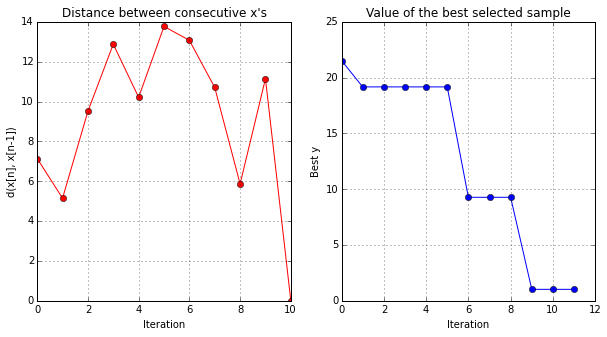

In [10]:
# boDeepGP.plot_acquisition()
boDeepGP.plot_convergence()